In [72]:
from Define_Model.FilterLayer import FreqTimeReweightLayer, get_weight
import torch
import kaldiio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
ftl = FreqTimeReweightLayer()
# x = torch.randn(2, 1, 300, 161)
sample = kaldiio.load_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox2/klsp/spect/dev/raw_spect_dev.1.ark:26')
chunk_sample = sample[300:]
x = torch.tensor(chunk_sample).unsqueeze(0).unsqueeze(0)
x -= x.mean(dim=-2, keepdim=True)

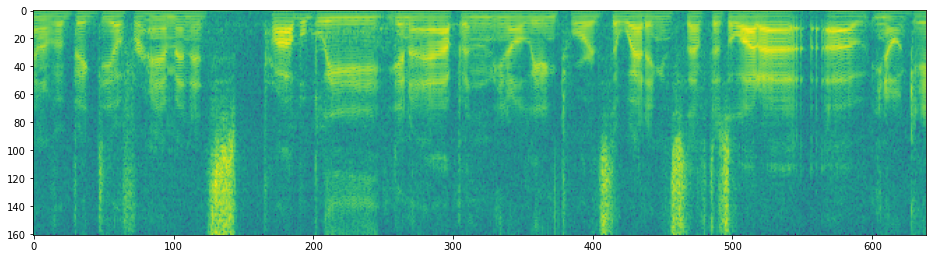

In [3]:
plt.figure(figsize=(16, 6))

plt.imshow(chunk_sample.T)

In [5]:
weight = torch.ones(1,1,1,161)
sig = torch.nn.Sigmoid()

In [14]:
y1 = x * sig(weight)
y2 = x * sig(y1.sum(dim=-2, keepdim=True))

In [13]:
sig(y1.sum(dim=-2, keepdim=True))

tensor([[[[0.5001, 0.5001, 0.5000, 0.5000, 0.4998, 0.5000, 0.5001, 0.4999,
           0.5000, 0.5000, 0.4999, 0.5001, 0.4998, 0.4999, 0.5001, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5001, 0.5001, 0.5002, 0.5000, 0.4999,
           0.5000, 0.5000, 0.4999, 0.5000, 0.5000, 0.5000, 0.4998, 0.4999,
           0.5001, 0.4998, 0.5000, 0.5001, 0.5001, 0.5000, 0.5001, 0.5000,
           0.4999, 0.5000, 0.4999, 0.5000, 0.5000, 0.4999, 0.5001, 0.5000,
           0.5001, 0.5001, 0.4999, 0.5001, 0.5000, 0.4999, 0.5000, 0.5000,
           0.5000, 0.5000, 0.4999, 0.5001, 0.4999, 0.5001, 0.5001, 0.4999,
           0.5001, 0.4999, 0.5001, 0.5001, 0.5001, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5001, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5001,
           0.4999, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
           0.5000, 0.5000, 0.5000, 0.5000, 0.5001, 0.5001, 0.4999, 0.5000,
           0.5000, 0.5001

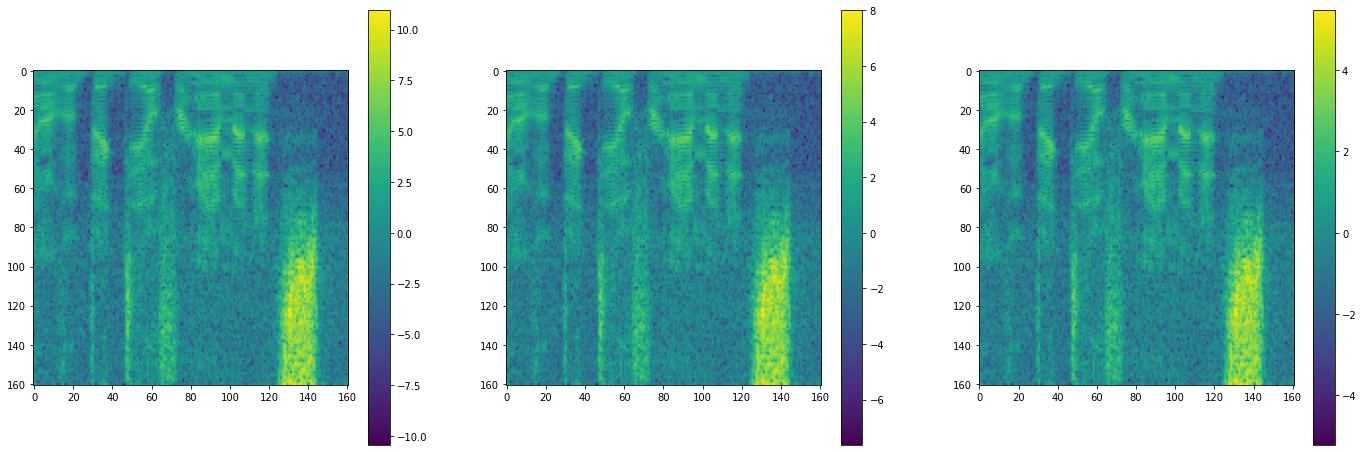

In [15]:
y = ftl(x)

plt.figure(figsize=(24, 8))
plt.subplot(1,3,1)
plt.imshow(x.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(y1.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(y2.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

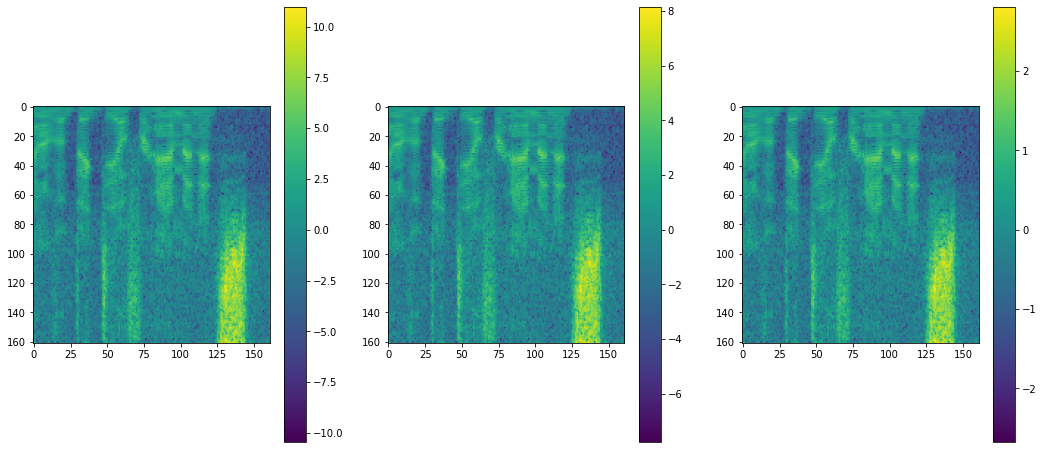

In [9]:
y = ftl(x)

plt.figure(figsize=(18, 8))
plt.subplot(1,3,1)
plt.imshow(x.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(y.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow((x-y).squeeze().detach().numpy().T[:,:161])
plt.colorbar()

In [5]:
mel = get_weight(weight='mel', input_dim=161, power_weight='')

In [6]:
ftl.weight.data *= torch.tensor((mel-mel.mean())*10).reshape(1,1,1,-1)

In [41]:
ftl.weight.data

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1.]]]])

In [26]:
mel.shape

(161,)

In [63]:
a = x.squeeze().numpy()[:200,:]
final = np.zeros(a.shape)
threshold = 0.15

In [59]:
print(a.shape, final.shape)

(200, 161) torch.Size([200, 161])


In [52]:
a.reshape(1, 200*161)

array([[ 0.90426636,  0.9099083 ,  1.7623205 , ..., -1.743185  ,
        -2.9328976 , -2.4849186 ]], dtype=float32)

In [66]:
start = a.reshape(1, 200*161, order='F')
final = final.reshape(1, 200*161, order='F')

In [65]:
start.shape

(1, 32200)

In [67]:
start[0, 0:int((200*161)*threshold)] = final[0, 0:int((200*161)*threshold)]

In [68]:
start = torch.from_numpy(start.reshape(200, 161, order='F'))

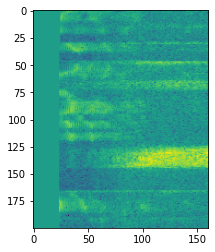

In [69]:
plt.imshow(start)

In [116]:
time_data = []
p = '../../Data/gradient/ThinResNet34_ser06/Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var/arcsoft_sgd_rop/vox2/123456/epoch_41_var_layer_cam_soft/epoch_41/data_grad.pickle'
with open(p, 'rb') as f:
    for (data, grad) in pickle.load(f):
        time_data.append((data, grad))
        break

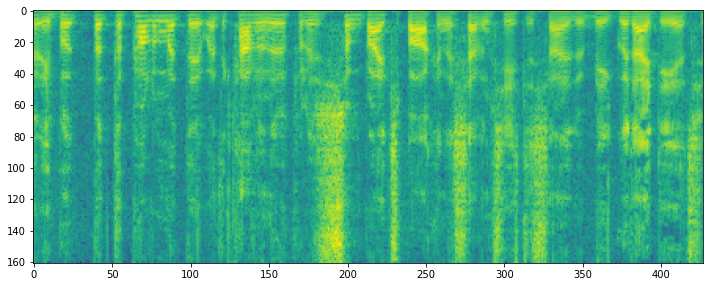

In [117]:
plt.figure(figsize=(12, 6))
plt.imshow(time_data[0][0].T)

In [118]:
def preprocessing(grad, dim=80):
    grad_t = grad.sum(axis=1, keepdims=True)#.reshape(-1,1)
    cam_min, cam_max = grad_t.min(), grad_t.max()

    pre_cam = np.tile((grad_t - cam_min) / (cam_max - cam_min + 1e-8), (1, dim))
    # pre_cam = np.int64(pre_cam > 0.4).reshape(-1, dim)

    return pre_cam

In [119]:
x = time_data[0][0][:200]
c = time_data[0][1][:200]

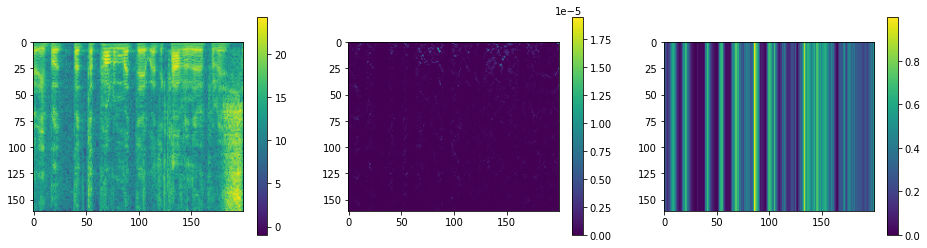

In [124]:
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.imshow(x.T)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(c.T)
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(preprocessing(c, dim=161).T)
plt.colorbar()

In [145]:
def input_reprocessing(data, grad, threshold=0.15, pro_type='del'):
    H, W = data.shape
    start = np.zeros(data.shape)
    final = data.copy()

    if pro_type == 'insertion':
        salient_order = np.flip(np.argsort(grad.reshape(H*W)), axis=0)
    else:
        salient_order = np.argsort(grad.reshape(H*W))
        threshold = 1 - threshold
    
    coords = salient_order[0:int((H*W)*threshold)]
    start.reshape(H*W)[coords] = final.reshape(H*W)[coords]

    return start

In [130]:
salient_order = np.flip(np.argsort(c.reshape(-1), axis=0))
coords = salient_order[0:int((200*161)*threshold)]

In [131]:
coords

array([13692, 13855, 21421, ..., 17803, 17132, 28886])

In [139]:
threshold = 0.85

salient_order = np.flip(np.argsort(c.reshape(-1), axis=0))
coords = salient_order[0:int((200*161)*threshold)]

final = x.copy()
start = np.zeros(x.shape)

start.reshape(200*161)[coords] = final.reshape(200*161)[coords]

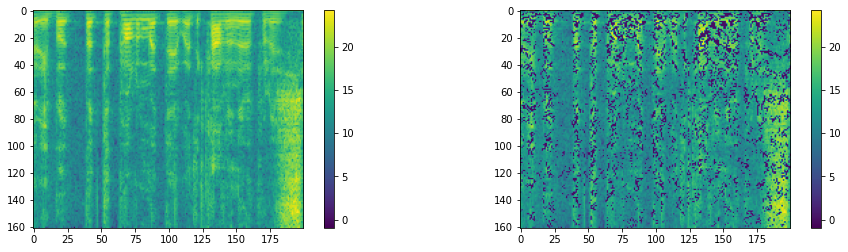

In [151]:
plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.imshow(x.T)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(input_reprocessing(x, c, threshold=0.15,).T)
plt.colorbar()

In [136]:
np.argsort(np.arange(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [251]:
label_pred = []

for i in range(10):
    l = np.random.randn(1)
    p = torch.randn(5994).numpy()
    label_pred.append([l, p])

In [252]:
label_pred[0][0]

array([0.63563021])

In [168]:
import pandas as pd
import json
import os
import h5py
from tqdm import tqdm

In [253]:
df = pd.DataFrame(label_pred, columns=['label', 'predict'])

In [258]:
json(torch.randn(1)[0].numpy())

TypeError: 'module' object is not callable

In [182]:
def pick2h5py(eval_dir, utt2spk):
    uid_json = os.path.join(eval_dir, 'data_grad.uid.json')
    with open(uid_json, 'r') as f:
        uids = json.load(f)
    if len(uids) != len(set(uids)):
        print(len(uids), len(set(uids)))
    
    sids = set([])
    uids_set = set(uids)
    uid2sid = {}
    with open(utt2spk, 'r') as f:
        for l in tqdm(f.readlines(), ncols=50):
            u, s = l.split()
            if u in uids_set:
                uid2sid[u] = s
                
            sids.add(s)
            
    sids = list(sids)
    sids.sort()
    
    sid2idx = {i: idx for idx, i in enumerate(sids)}
        
    p = os.path.join(eval_dir, 'data_grad.pickle')
    data_file = os.path.join(eval_dir, 'data.h5py')
    grad_file = os.path.join(eval_dir, 'grad.h5py')
    saved_uid = set([])
    
    with open(p, 'rb') as f:
        with h5py.File(data_file, 'w') as df, \
            h5py.File(grad_file, 'w') as gf:
            for i, (d, g) in tqdm(enumerate(pickle.load(f)), ncols=50):
                if uids[i] not in saved_uid:
                    saved_uid.add(uids[i])
                    df.create_dataset(uids[i], data=d)
                    gf.create_dataset(uids[i], data=g)
                
    uid2idx_file = os.path.join(eval_dir, 'uid_idx.json')
    uid2idx = [[u, sid2idx[uid2sid[u]]] for u in uids]
    with open(uid2idx_file, 'w')as f:
        json.dump(uid2idx, f)


In [183]:
eval_dir = '../../Data/gradient/ThinResNet34_ser06/Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var/arcsoft_sgd_rop/vox2/123456/epoch_41_var_layer_cam_soft/epoch_41'
utt2spk = '/home/yangwenhao/local/project/lstm_speaker_verification/data/vox2/dev/utt2spk'

pick2h5py(eval_dir, utt2spk)

23976 23395


100%|█| 1092009/1092009 [00:00<00:00, 2314885.07it
23976it [06:16, 63.76it/s] 


In [306]:
del_01 = pd.read_json('../../Data/gradient/ThinResNet34_ser06/Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var/arcsoft_sgd_rop/vox2/123456/epoch_41_var_layer_cam_soft/epoch_41/vox2_valid.label_pred.none.0.00.json')

In [309]:
labels = np.array(del_01.label.to_list()).reshape(-1)
predicted_labels = np.array(del_01.predict.to_list())

print(np.sum(labels == np.argmax(predicted_labels, axis=1)) / len(labels))

0.09868201534868201


In [304]:
b = np.arange(10)
np.random.shuffle(b)

In [305]:
b

array([4, 9, 3, 2, 7, 5, 8, 0, 6, 1])